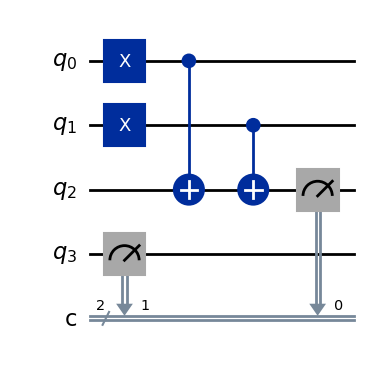

In [2]:
from qiskit import QuantumCircuit
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw()
qc = QuantumCircuit(4,2)
qc.x(0)
qc.x(1)
qc.cx(0,2)
qc.cx(1,2)
qc.measure(2,0)
qc.measure(3,1)
qc.draw()

Measurement Outcomes Counts: {'101': 1024}


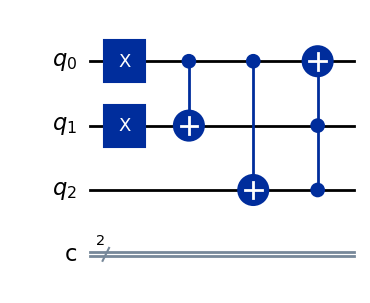

In [52]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Define your quantum circuit
qc = QuantumCircuit(3, 2)
qc.x(0)
qc.x(1)
qc.cx(0, 1)
qc.cx(0, 2)
qc.ccx(1, 2, 0)

# Simulate the circuit to obtain the final state
state = Statevector.from_instruction(qc)

# Perform a measurement
measured_state = state.sample_counts(shots=1024)

# Print the counts
print("Measurement Outcomes Counts:", measured_state)

# Draw the circuit
qc.draw()


Measurement Outcomes Counts: {'11100111': 1024}


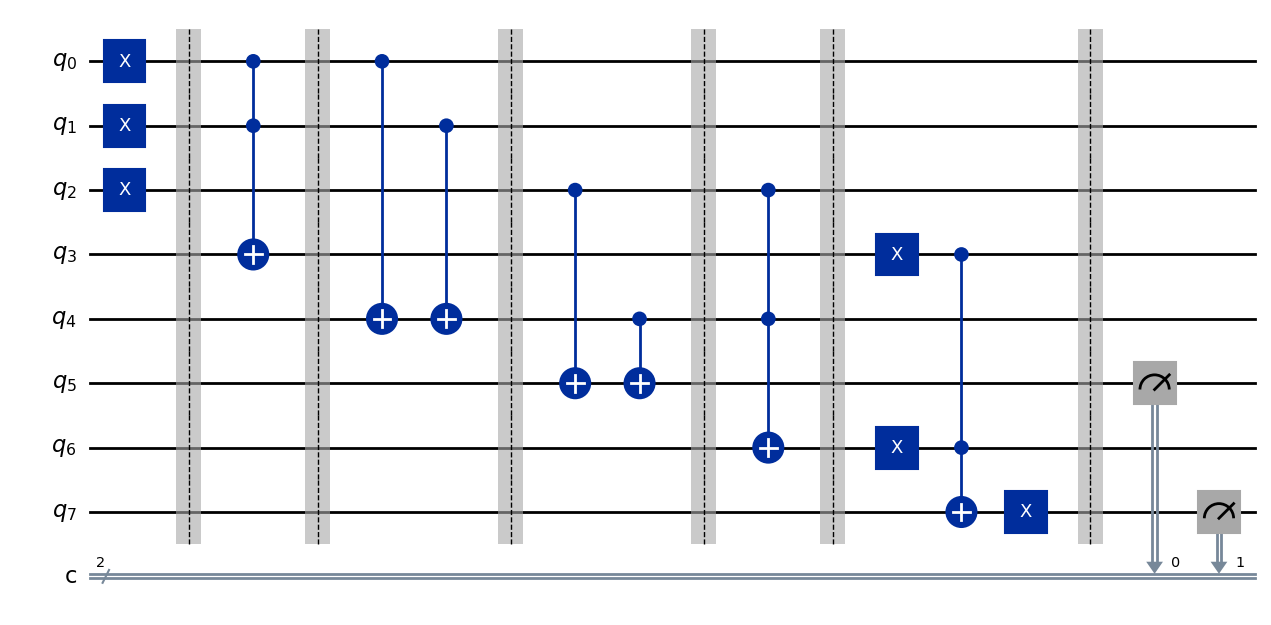

In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(8,2)
# Preparing inputs
qc.x(0) # Comment this line to make Qbit0 = |0>
qc.x(1) # Comment this line to make Qbit1 = |0>
qc.x(2) # Comment this line to make Qbit2 = |0> ( carry-in bit )
qc.barrier()

# AND gate1 implementation
qc.ccx(0,1,3)
qc.barrier()
# OR gate1 implementation
qc.cx(0,4)
qc.cx(1,4)
qc.barrier()
# OR gate2 implementation
qc.cx(2,5)
qc.cx(4,5)
qc.barrier()
# AND gate2 implementation
qc.ccx(2,4,6)
qc.barrier()
# OR gate implementation
qc.x(3)
qc.x(6)
qc.ccx(3,6,7)
qc.x(7)
qc.barrier()
# Measuring and put result to classical bit
 # ( carry-out )
# Run the experimient 1024 times and get stats
state = Statevector.from_instruction(qc)
qc.measure(5,0) # ( sum )
qc.measure(7,1)
# Perform a measurement
measured_state = state.sample_counts(shots=1024)

# Print the counts
print("Measurement Outcomes Counts:", measured_state)

qc.draw(output='mpl')

Measurement Outcomes Counts: {'001': 1024}


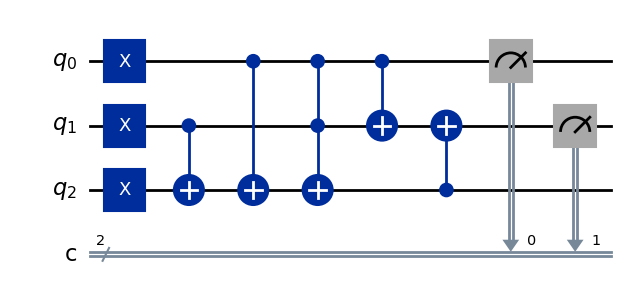

In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
# Create a full subtractor circuit with 3 qubits and 2 classical bits
qc = QuantumCircuit(3, 2)
# Apply the input values to the qubits
qc.x(0) # q_0
qc.x(1) # q_1
qc.x(2) # q_borrow (borrow in)
# Subtraction operation
qc.cx(1, 2) # q_1 --> q_borrow
qc.cx(0, 2) # q_0 --> q_borrow
# Borrow (borrow out)
qc.ccx(0, 1, 2) # q_0, q_1 --> q_borrow
# Difference output
qc.cx(0, 1) # q_0 --> q_1
qc.cx(2, 1) # q_borrow --> q_1
# Measure the result

state = Statevector.from_instruction(qc)
qc.measure([0, 1], [0, 1])
# Perform a measurement
measured_state = state.sample_counts(shots=1024)

# Print the counts
print("Measurement Outcomes Counts:", measured_state)

qc.draw()